In [1]:
import pandas as pd
from top2vec import Top2Vec
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer
from transformers import AutoModel

/Users/copa/miniforge/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Product clustering with Top2Vec

In [3]:
with open('product_table.pkl', 'rb') as f:
    product_table = pd.read_pickle(f)

In [4]:
#Extracting unique products
product_table = product_table[product_table['product_name']!= 'N/A']
set_docs = set(product_table['product_name'])

In [5]:
docs = list(set_docs)

In [6]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [7]:

top2vec_model = Top2Vec(documents=docs, embedding_model=model.encode, speed='learn')

2024-07-30 15:19:50,288 - top2vec - INFO - Pre-processing documents for training
/Users/copa/miniforge/envs/myenv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-07-30 15:19:50,706 - top2vec - INFO - Creating joint document/word embedding
2024-07-30 15:20:09,379 - top2vec - INFO - Creating lower dimension embedding of documents
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2024-07-30 15:20:21,748 - top2vec - INFO - Finding dense areas of documents
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current pro

In [8]:
topic_sizes, topic_nums = top2vec_model.get_topic_sizes()

In [9]:
topic_sizes

array([653, 267, 263, 255, 247, 236, 226, 221, 204, 200, 189, 178, 175,
       166, 156, 152, 148, 146, 140, 140, 139, 138, 138, 138, 137, 137,
       137, 135, 134, 132, 131, 127, 126, 124, 123, 121, 120, 119, 118,
       118, 116, 115, 114, 111, 110, 109, 107, 106, 105, 104, 104, 104,
       103, 102,  99,  99,  99,  99,  98,  98,  98,  97,  96,  96,  95,
        94,  93,  92,  92,  91,  91,  88,  87,  86,  85,  85,  85,  85,
        84,  83,  82,  82,  81,  81,  81,  81,  81,  80,  80,  79,  79,
        79,  78,  78,  78,  78,  77,  77,  77,  77,  76,  75,  75,  75,
        74,  73,  72,  72,  72,  72,  72,  72,  71,  70,  70,  69,  69,
        69,  69,  68,  68,  68,  68,  67,  67,  67,  67,  66,  66,  65,
        65,  65,  64,  64,  64,  64,  63,  63,  63,  63,  63,  62,  61,
        61,  60,  60,  60,  60,  60,  60,  59,  59,  59,  59,  59,  59,
        58,  58,  58,  58,  57,  57,  57,  57,  57,  56,  56,  56,  56,
        56,  55,  55,  55,  54,  54,  54,  54,  53,  53,  53,  5

In [10]:
topic_nums[-1]

365

In [11]:
topic_words, word_scores, topic_nums = top2vec_model.get_topics()

In [12]:
for words, scores, nums in zip(topic_words, word_scores, topic_nums):
    print(nums)
    print(f'Words: {words}')

0
Words: ['selling' 'trade' 'import' 'sale' 'customs' 'goods' 'buying' 'purchase'
 'supply' 'courier' 'supplies' 'products' 'export' 'manufacturing'
 'business' 'marketing' 'cargo' 'production' 'parcels' 'foreign'
 'packaging' 'transportation' 'souvenirs' 'advertising' 'industrial'
 'accessories' 'promotion' 'delivery' 'gifts' 'financial' 'advertisements'
 'companies' 'packages' 'jewelry' 'making' 'handmade' 'online'
 'international' 'abroad' 'accounting' 'equipment' 'boxes' 'custom'
 'replacement' 'leather' 'commercial' 'brand' 'technical' 'legal'
 'clothing']
1
Words: ['buildings' 'building' 'construction' 'houses' 'design' 'structures'
 'facilities' 'roofs' 'premises' 'interior' 'concrete' 'floors' 'panels'
 'furniture' 'cabinets' 'development' 'organizing' 'doors' 'rental'
 'engineering' 'planning' 'exterior' 'parcels' 'wall' 'industrial'
 'manufacturing' 'outdoor' 'inspection' 'room' 'floor' 'implementation'
 'tiles' 'kitchen' 'custom' 'estate' 'business' 'hotel' 'corporate'
 'ins

In [18]:
documents, documents_scores, document_ids = top2vec_model.search_documents_by_topic(topic_num=37, num_docs=10)

In [19]:
for doc, score, doc_id in zip(documents, documents_scores, document_ids):
    print(f'Document Id: {doc_id}, Score: {score}')
    print(doc)
    print('-----------')

Document Id: 5315, Score: 0.9682409763336182
Musical Instruments (trade) (selling)
-----------
Document Id: 10499, Score: 0.9671080112457275
Musical Instruments (trade) (import and selling)
-----------
Document Id: 2668, Score: 0.9453380703926086
Musical Instruments (trade) (import and online sale)
-----------
Document Id: 22147, Score: 0.9453269839286804
Musical Instruments (trade) (import and selling) (with delivery)
-----------
Document Id: 4238, Score: 0.940996527671814
Musical Instruments: Guitar (trade) (import and selling)
-----------
Document Id: 9715, Score: 0.9341937303543091
Musical Instruments: Guitar (trade) (selling)
-----------
Document Id: 892, Score: 0.9122779965400696
Musical Instruments: Violin (trade) (selling)
-----------
Document Id: 3866, Score: 0.9085480570793152
Musical Instruments: Violin (trade) (import and selling)
-----------
Document Id: 9030, Score: 0.9072170853614807
Components for Musical Instruments (trade) (import and selling)
-----------
Document Id:

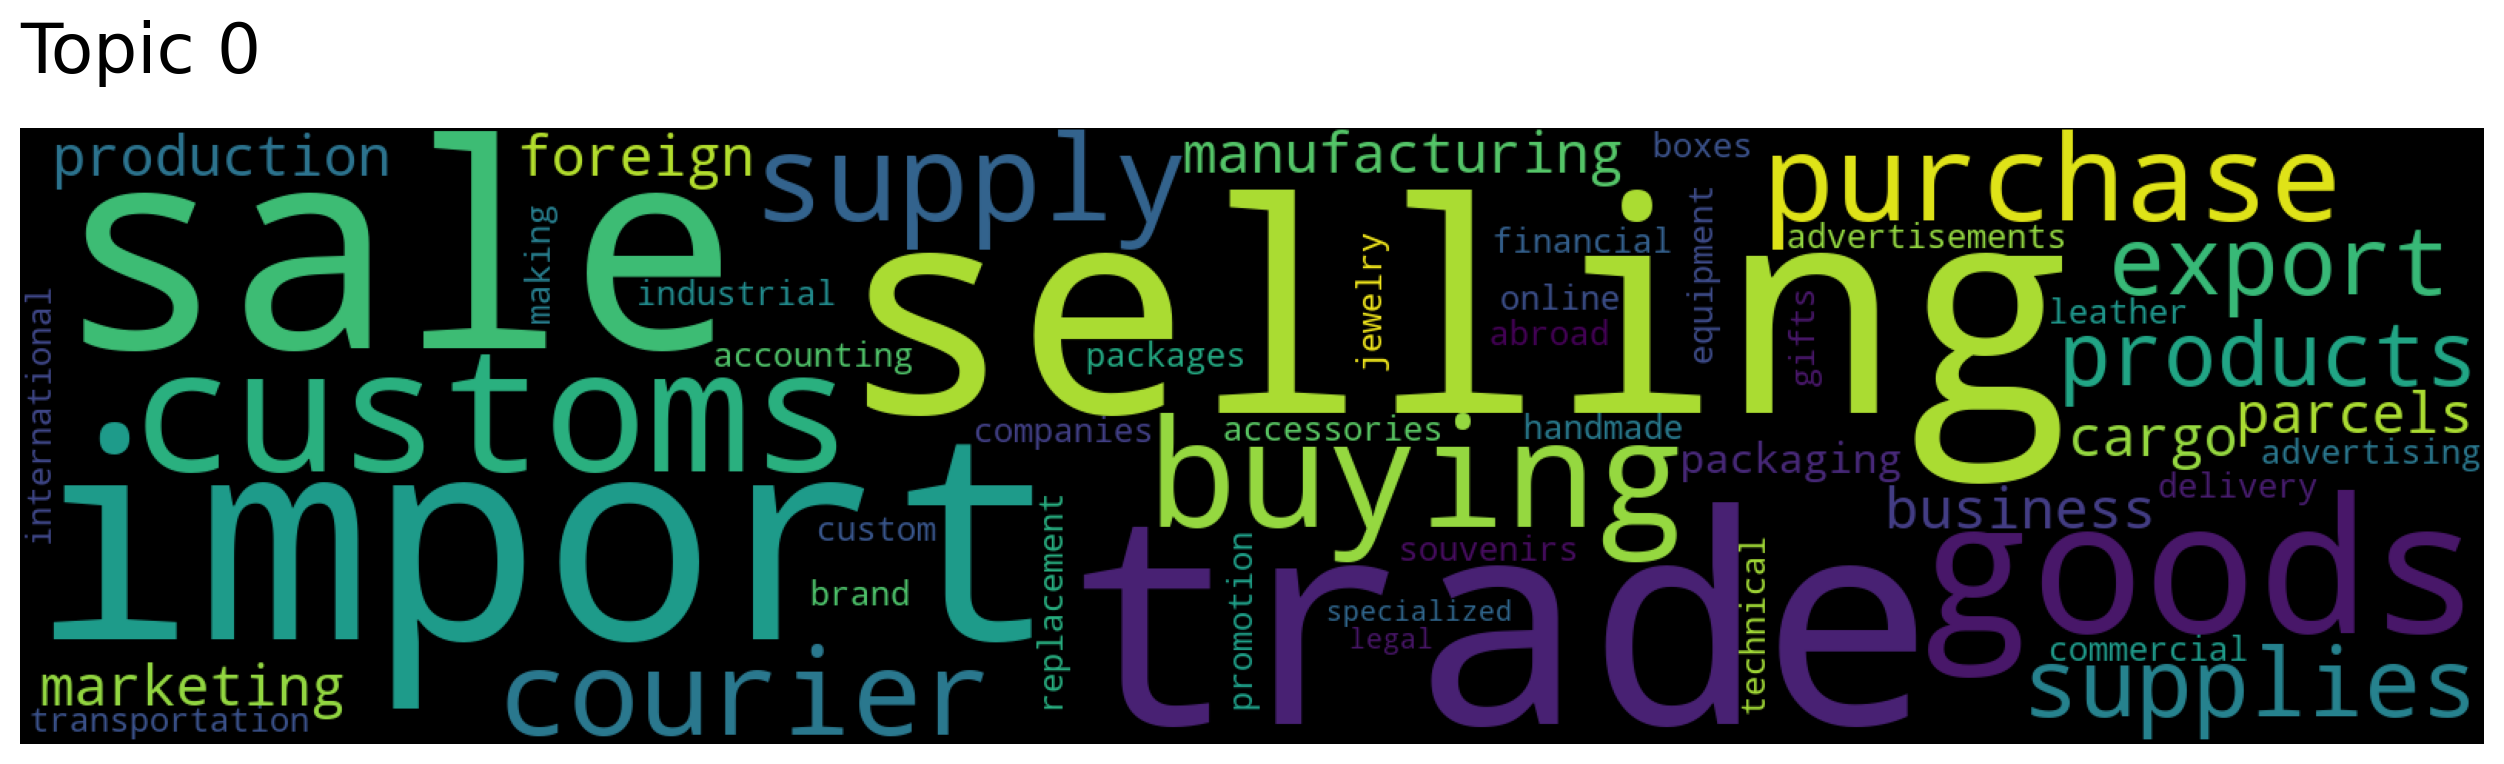

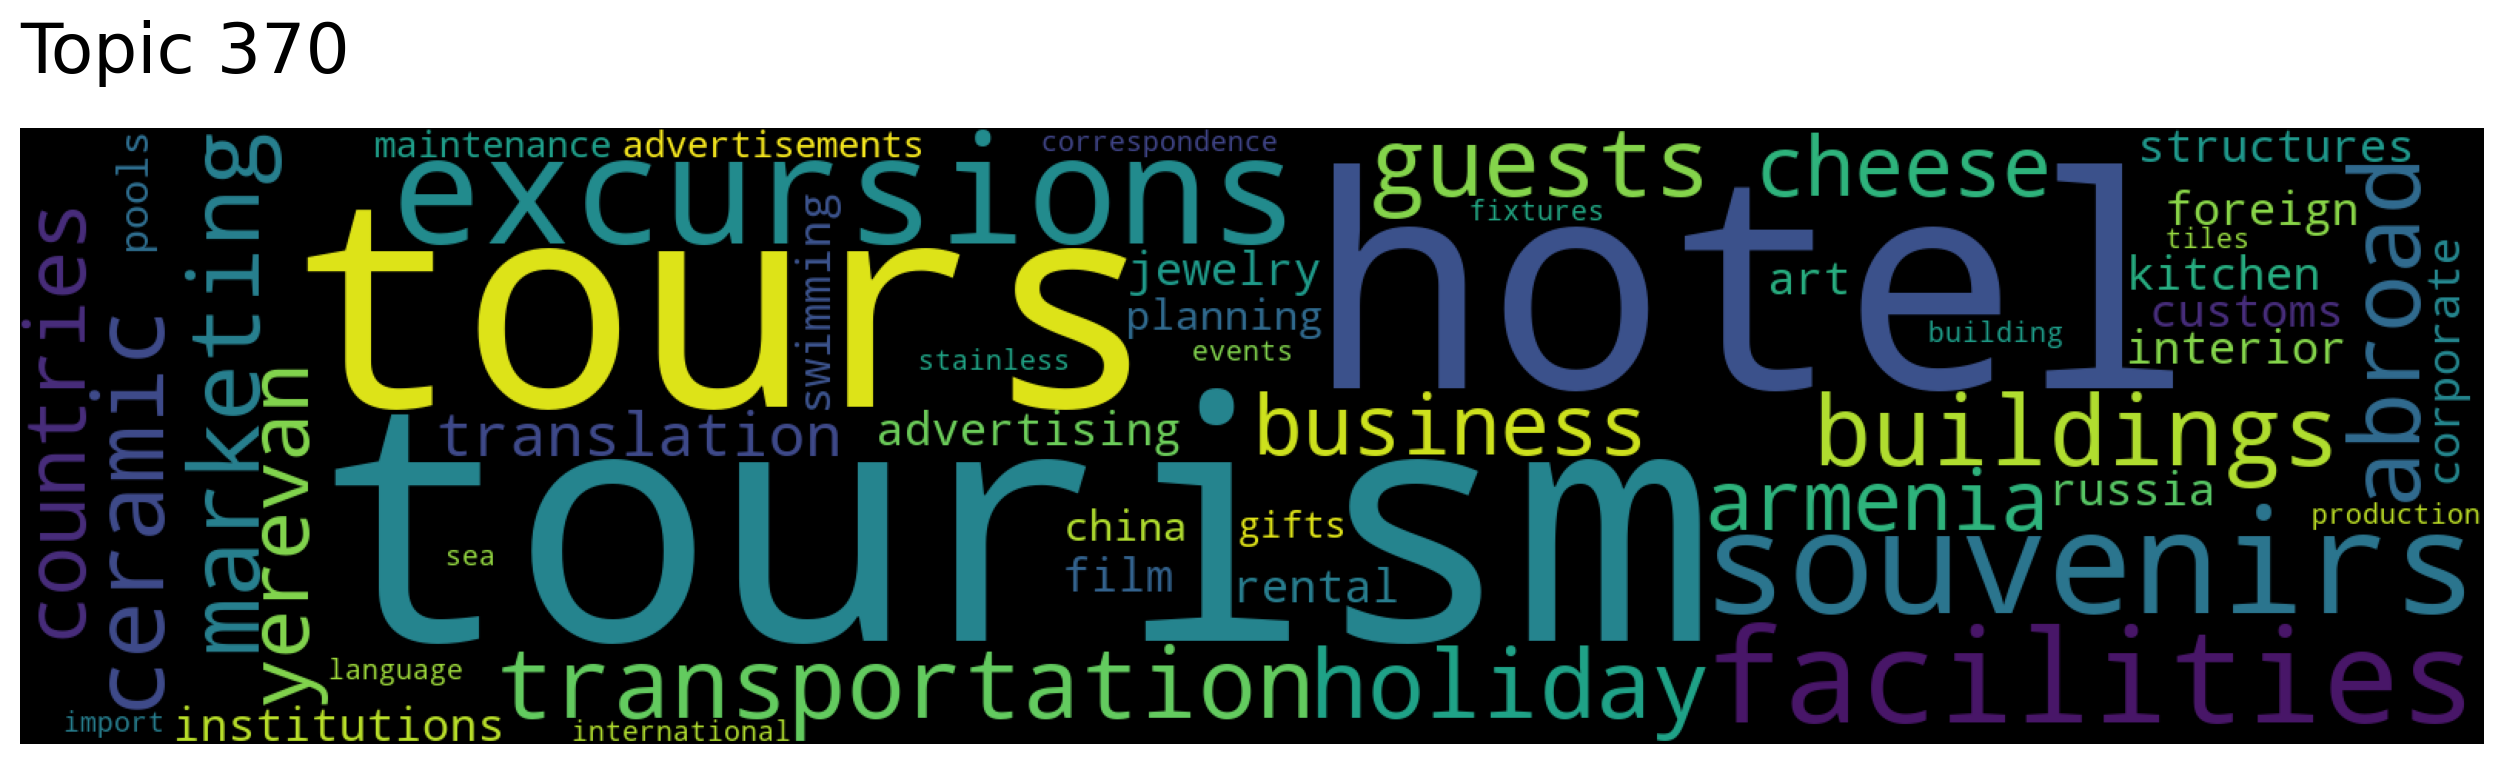

In [26]:
top2vec_model.generate_topic_wordcloud(0)
top2vec_model.generate_topic_wordcloud(370)